In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Hierarchical Clustering
## Dendrogram

#### Create dendrogram and print out cluster tables for given nuber of clusters

In [3]:
def dendroType(methodology, datasetDendro, allData, lastCluster, locationDendro, datasetPlusPleasent):

    distanceMethod = linkage(datasetDendro, method=methodology)
    plt.figure(figsize=(36,12))
    dendrogram(distanceMethod, leaf_rotation=90)
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.suptitle("Dendrogram %s Method_%s_%d_%d" % (methodology, LocationSub, YearMin, YearMax),fontsize=18)
    plt.savefig(os.path.join(path, '2.01 Unguided machine learning 01', 'dendrogram_%s_%s_%d_%d.png' % (methodology, LocationSub, YearMin, YearMax)))
    plt.show()
    
    for n in range (2, lastCluster):
        # dfModel = pleasent.copy()
        datasetPlusPleasent['Clusters'] = fcluster(distanceMethod, n, criterion='maxclust')
        # datasetDendro['Pleasent'] = allData["pleasant_weather"]
        # datasetDendro['Clusters'] = allData["Clusters"]
        # print(datasetDendro)
        print("")
        print(locationDendro.upper()+": "+methodology.upper())
        print(pd.crosstab(datasetPlusPleasent["Pleasent"], datasetPlusPleasent["Clusters"]))
        print("")
        

#### Import datasets and clean data

In [4]:
path = r'C:\Users\Michael\Desktop\Career Foundry\03 Machine Learning\02 Real-World Applications of Machine Learning'

In [5]:
df_weather = pd.read_csv(os.path.join(path, 'Data Sets', 'DATASET weather_prediction_TIDY_TRIM.csv'), index_col = False)
df_pleasent = pd.read_csv(os.path.join(path, 'Data Sets', 'DATASET weather_pleasant_TIDY.csv'), index_col = False)

In [6]:
# subset for plotting
df_weatherSub = df_weather.drop(columns=['DATE'])
df_pleasentSub = df_pleasent.drop(columns=['DATE'])

In [7]:
# select the years and location for assessment
YearMin = 2010
Years = 5
YearMax = YearMin + Years - 1
LocationSub = 'MADRID'
df_YearSub = df_weatherSub[['cloud_cover', 'wind_speed','humidity','pressure','global_radiation','precipitation','snow_depth','sunshine','temp_mean','temp_min','temp_max']].loc[(df_weatherSub.YEAR <= YearMax) & (df_weatherSub.YEAR >= YearMin) & (df_weatherSub.LOCATION == LocationSub)]
df_pleasentYearSub = df_pleasentSub[['pleasant_weather']].loc[(df_weatherSub.YEAR <= YearMax) & (df_weatherSub.YEAR >= YearMin) & (df_weatherSub.LOCATION == LocationSub)]
dataset = df_YearSub.dropna(axis=1)

In [8]:
df_YearSub

,cloud_cover,wind_speed,humidity,pressure,global_radiation,precipitation,snow_depth,sunshine,temp_mean,temp_min,temp_max
224813,5.0,4.4,0.82,1.0107,0.46,0.01,NaN,2.8,5.6,3.6,7.6
224814,7.0,1.1,0.81,1.0205,0.42,0.00,NaN,0.3,5.0,2.6,7.5
224815,8.0,0.8,0.86,1.0182,0.25,0.67,NaN,0.0,5.8,4.2,7.4
224816,7.0,1.7,0.95,1.0059,0.14,0.95,NaN,0.0,7.8,6.4,9.2
224817,7.0,0.6,0.89,1.0006,0.62,0.00,NaN,0.7,8.0,6.2,9.8
...,...,...,...,...,...,...,...,...,...,...,...
226634,5.0,1.1,0.85,1.0254,0.87,0.00,NaN,4.3,5.4,2.1,8.8
226635,5.0,2.5,0.66,1.0190,0.60,0.00,NaN,1.7,7.3,3.4,11.2
226636,0.0,3.6,0.36,1.0320,1.17,0.00,NaN,9.0,5.2,1.6,8.9
226637,0.0,0.6,0.45,1.0343,1.11,0.00,NaN,9.0,3.7,-1.9,9.3


In [9]:
dataset = df_YearSub.dropna(axis=1)

In [10]:
scaled_features = StandardScaler().fit_transform(dataset)
scaled_features

array([[ 0.57541877,  2.81802163,  1.33056971, ..., -1.27213375,
        -1.03682799, -1.41552603],
       [ 1.32140007, -0.9649125 ,  1.27172973, ..., -1.34922935,
        -1.18682267, -1.42650904],
       [ 1.69439073, -1.30881561,  1.56592961, ..., -1.24643521,
        -0.94683118, -1.43749204],
       ...,
       [-1.2895345 ,  1.90094669, -1.37606919, ..., -1.32353082,
        -1.33681736, -1.27274702],
       [-1.2895345 , -1.53808434, -0.8465094 , ..., -1.51626982,
        -1.86179875, -1.22881501],
       [-1.2895345 , -1.53808434,  0.21261017, ..., -1.49057129,
        -1.81680035, -1.21783201]])

In [11]:
datasetPlusPleasent = dataset

datasetPlusPleasent['Pleasent'] = df_pleasentYearSub['pleasant_weather'].astype(int)
datasetPlusPleasent

,cloud_cover,wind_speed,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max,Pleasent
224813,5.0,4.4,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,0
224814,7.0,1.1,0.81,1.0205,0.42,0.00,0.3,5.0,2.6,7.5,0
224815,8.0,0.8,0.86,1.0182,0.25,0.67,0.0,5.8,4.2,7.4,0
224816,7.0,1.7,0.95,1.0059,0.14,0.95,0.0,7.8,6.4,9.2,0
224817,7.0,0.6,0.89,1.0006,0.62,0.00,0.7,8.0,6.2,9.8,0
...,...,...,...,...,...,...,...,...,...,...,...
226634,5.0,1.1,0.85,1.0254,0.87,0.00,4.3,5.4,2.1,8.8,0
226635,5.0,2.5,0.66,1.0190,0.60,0.00,1.7,7.3,3.4,11.2,0
226636,0.0,3.6,0.36,1.0320,1.17,0.00,9.0,5.2,1.6,8.9,0
226637,0.0,0.6,0.45,1.0343,1.11,0.00,9.0,3.7,-1.9,9.3,0


#### Name the Dendrogram Methods Required and Run Hierarchical Clustering

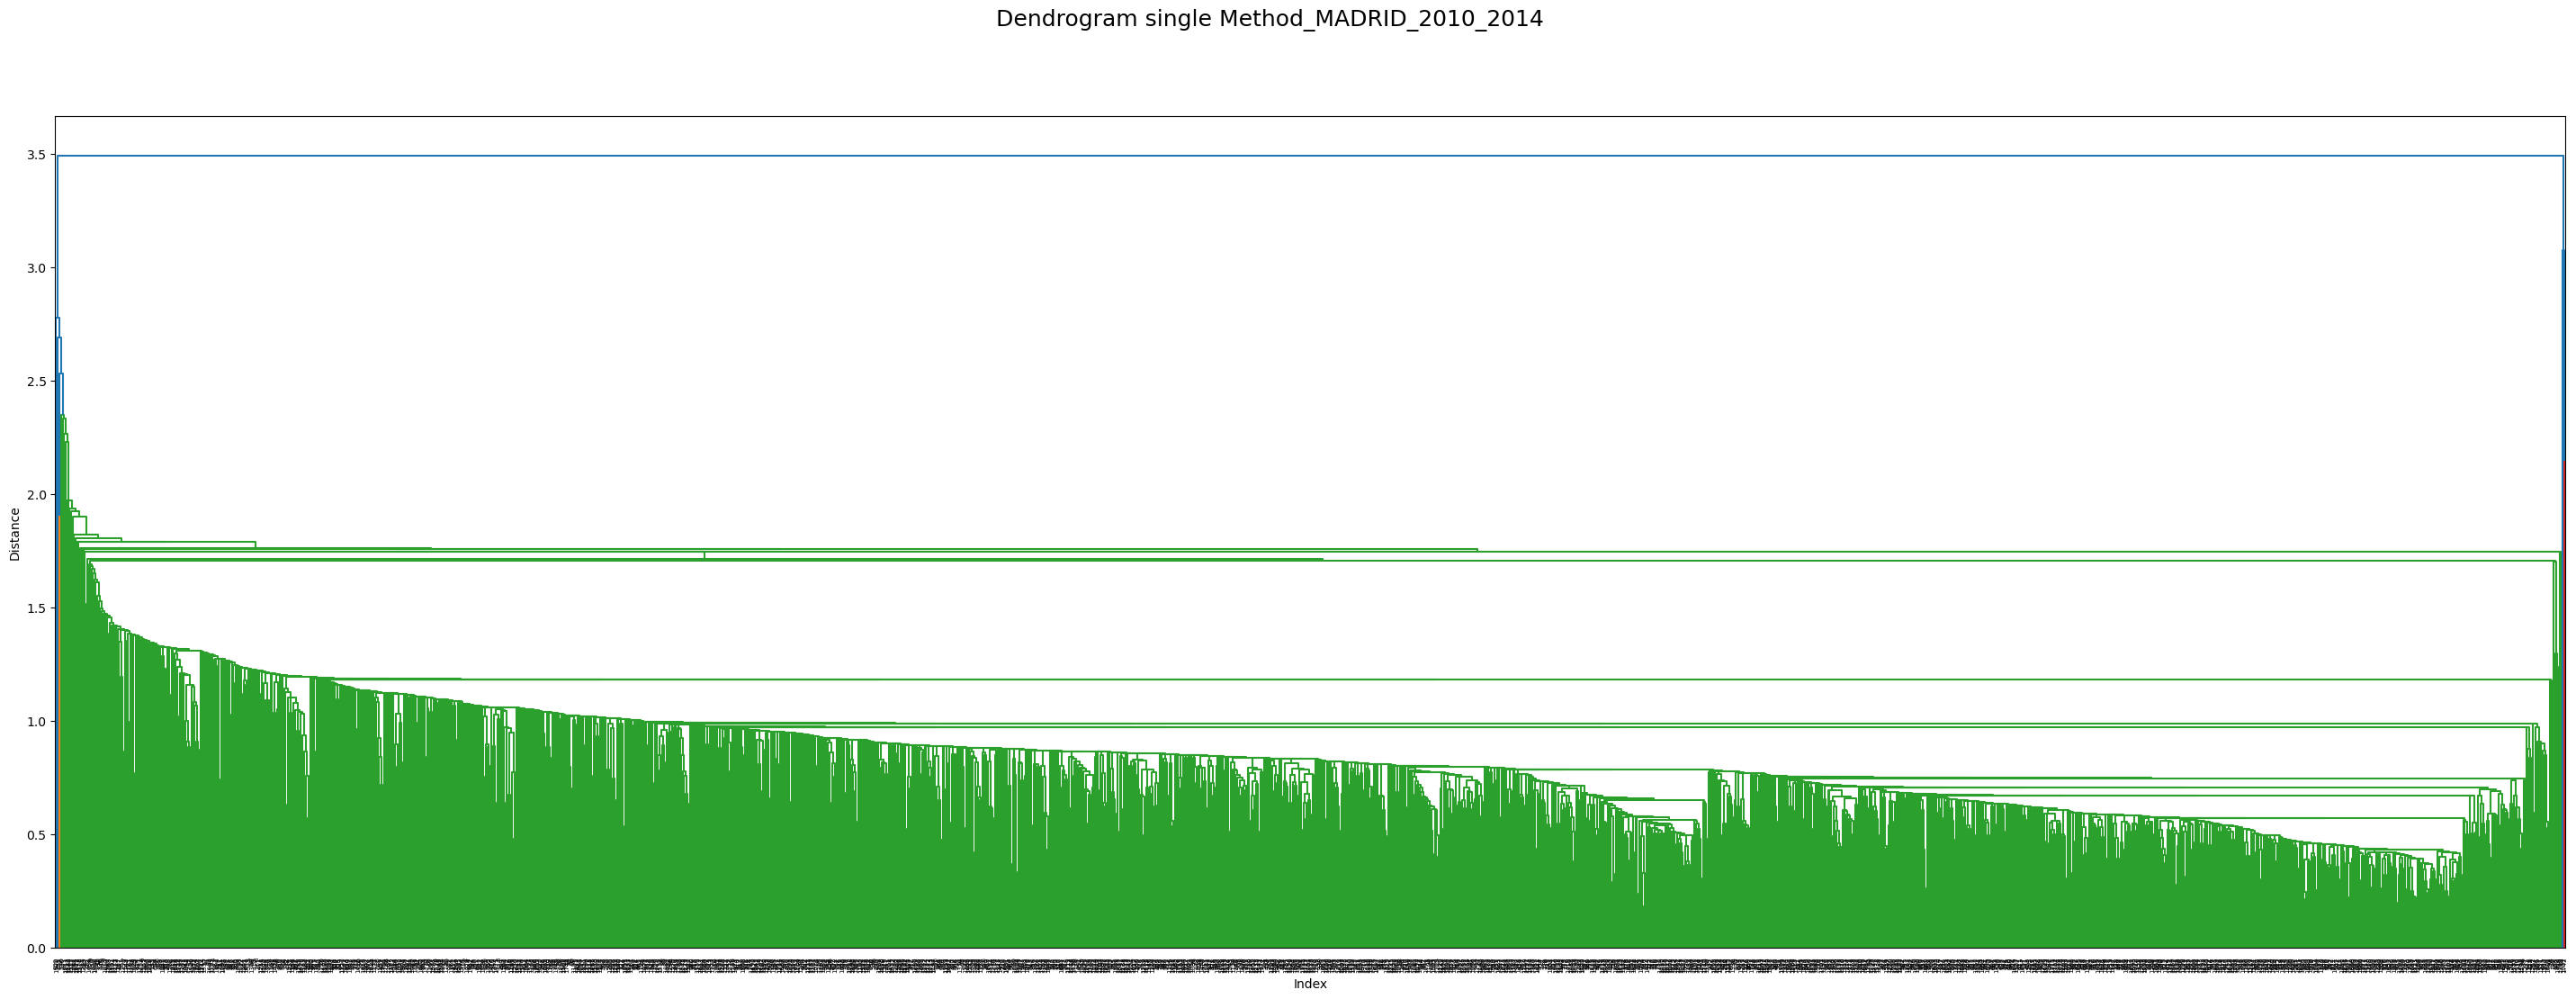


MADRID: SINGLE
Clusters    1  2
Pleasent        
0         958  3
1         865  0


MADRID: SINGLE
Clusters    1  2  3
Pleasent           
0         958  2  1
1         865  0  0


MADRID: SINGLE
Clusters    1  2  3  4
Pleasent              
0         957  1  2  1
1         865  0  0  0



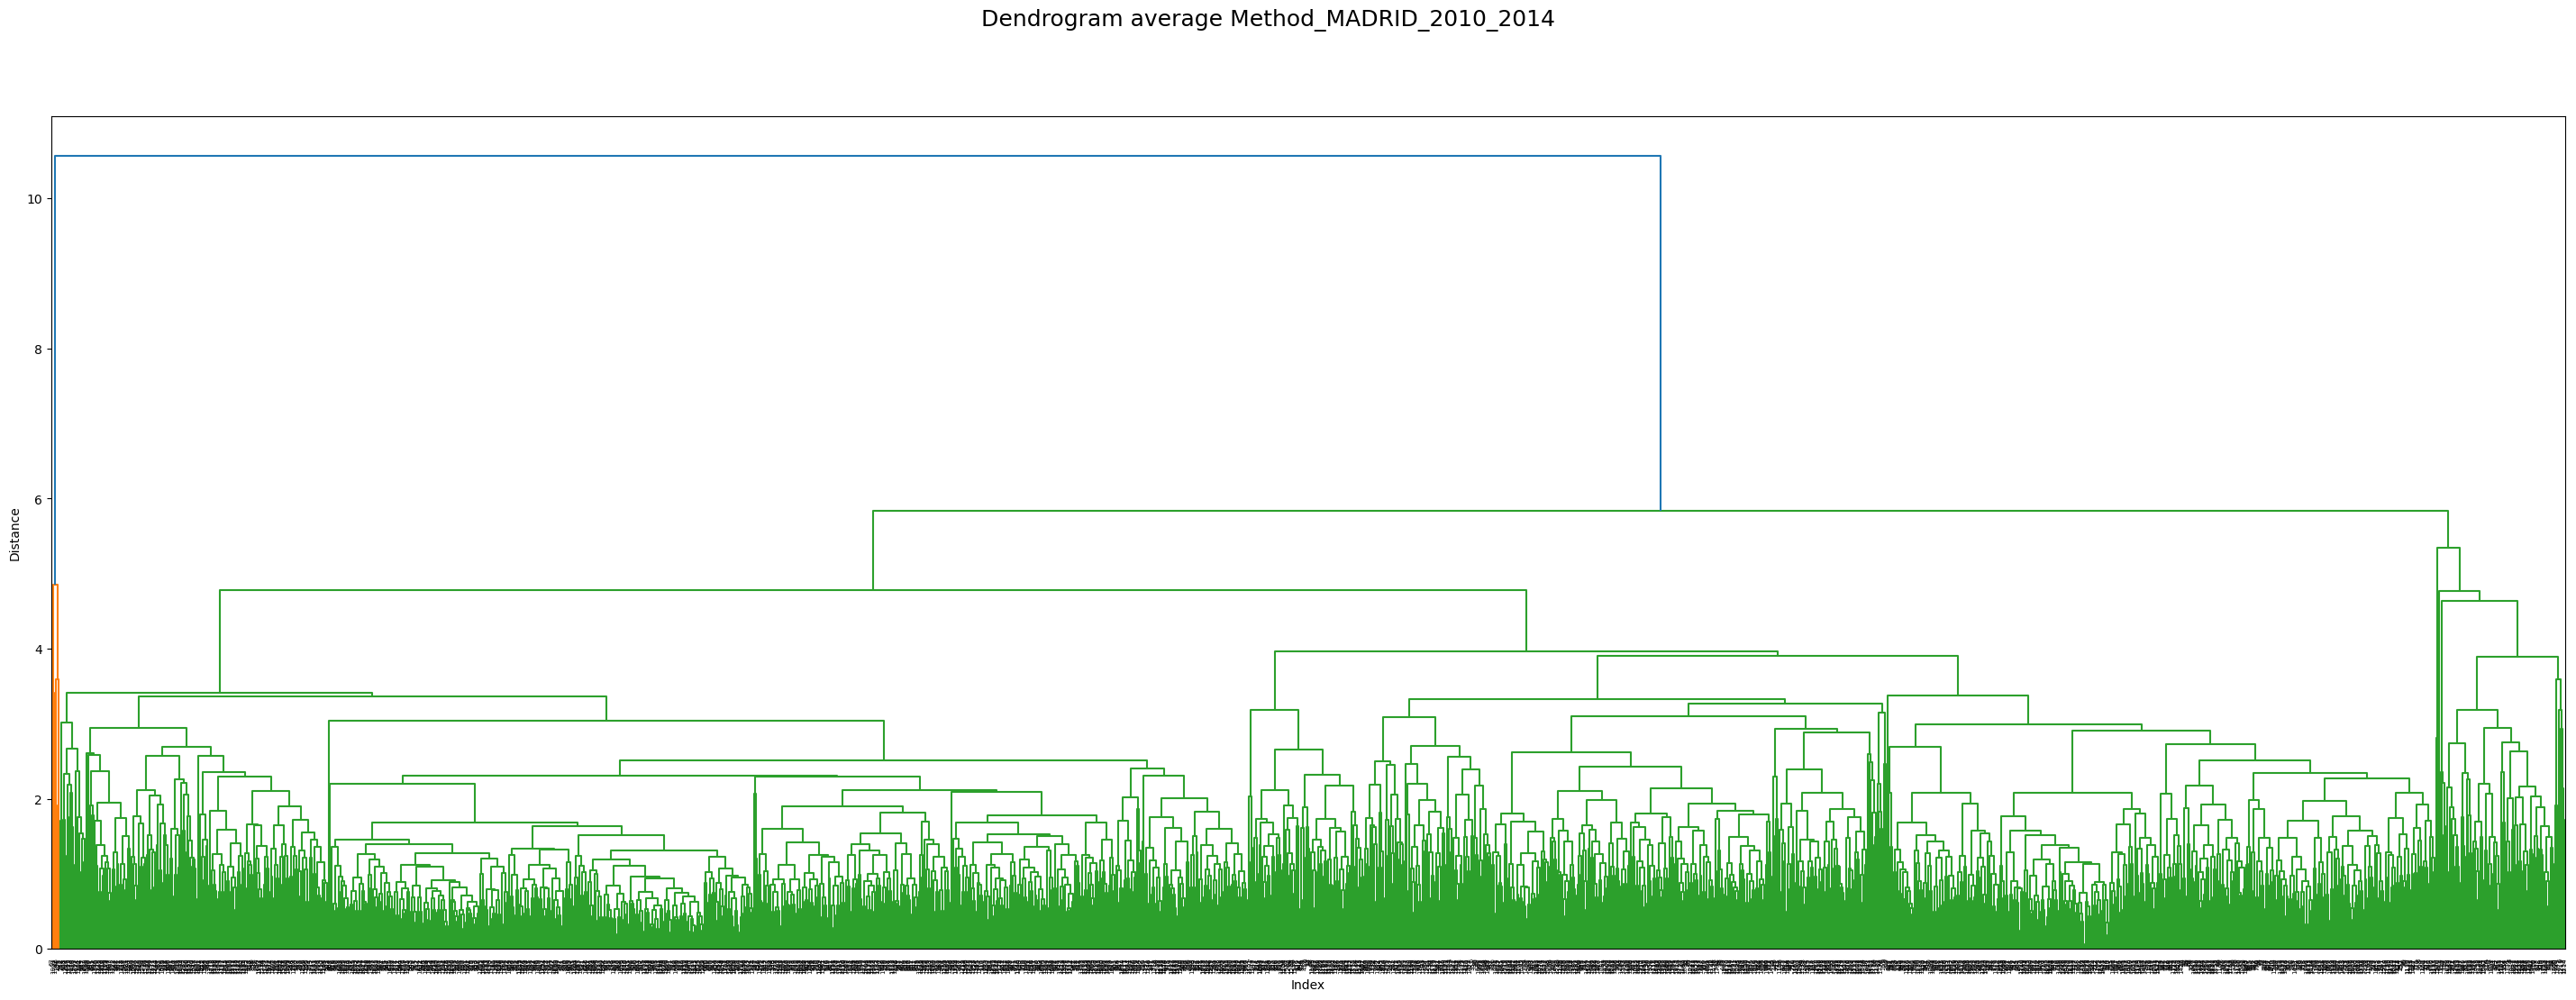


MADRID: AVERAGE
Clusters  1    2
Pleasent        
0         6  955
1         0  865


MADRID: AVERAGE
Clusters  1    2   3
Pleasent            
0         6  861  94
1         0  865   0


MADRID: AVERAGE
Clusters  1    2  3   4
Pleasent               
0         6  861  2  92
1         0  865  0   0



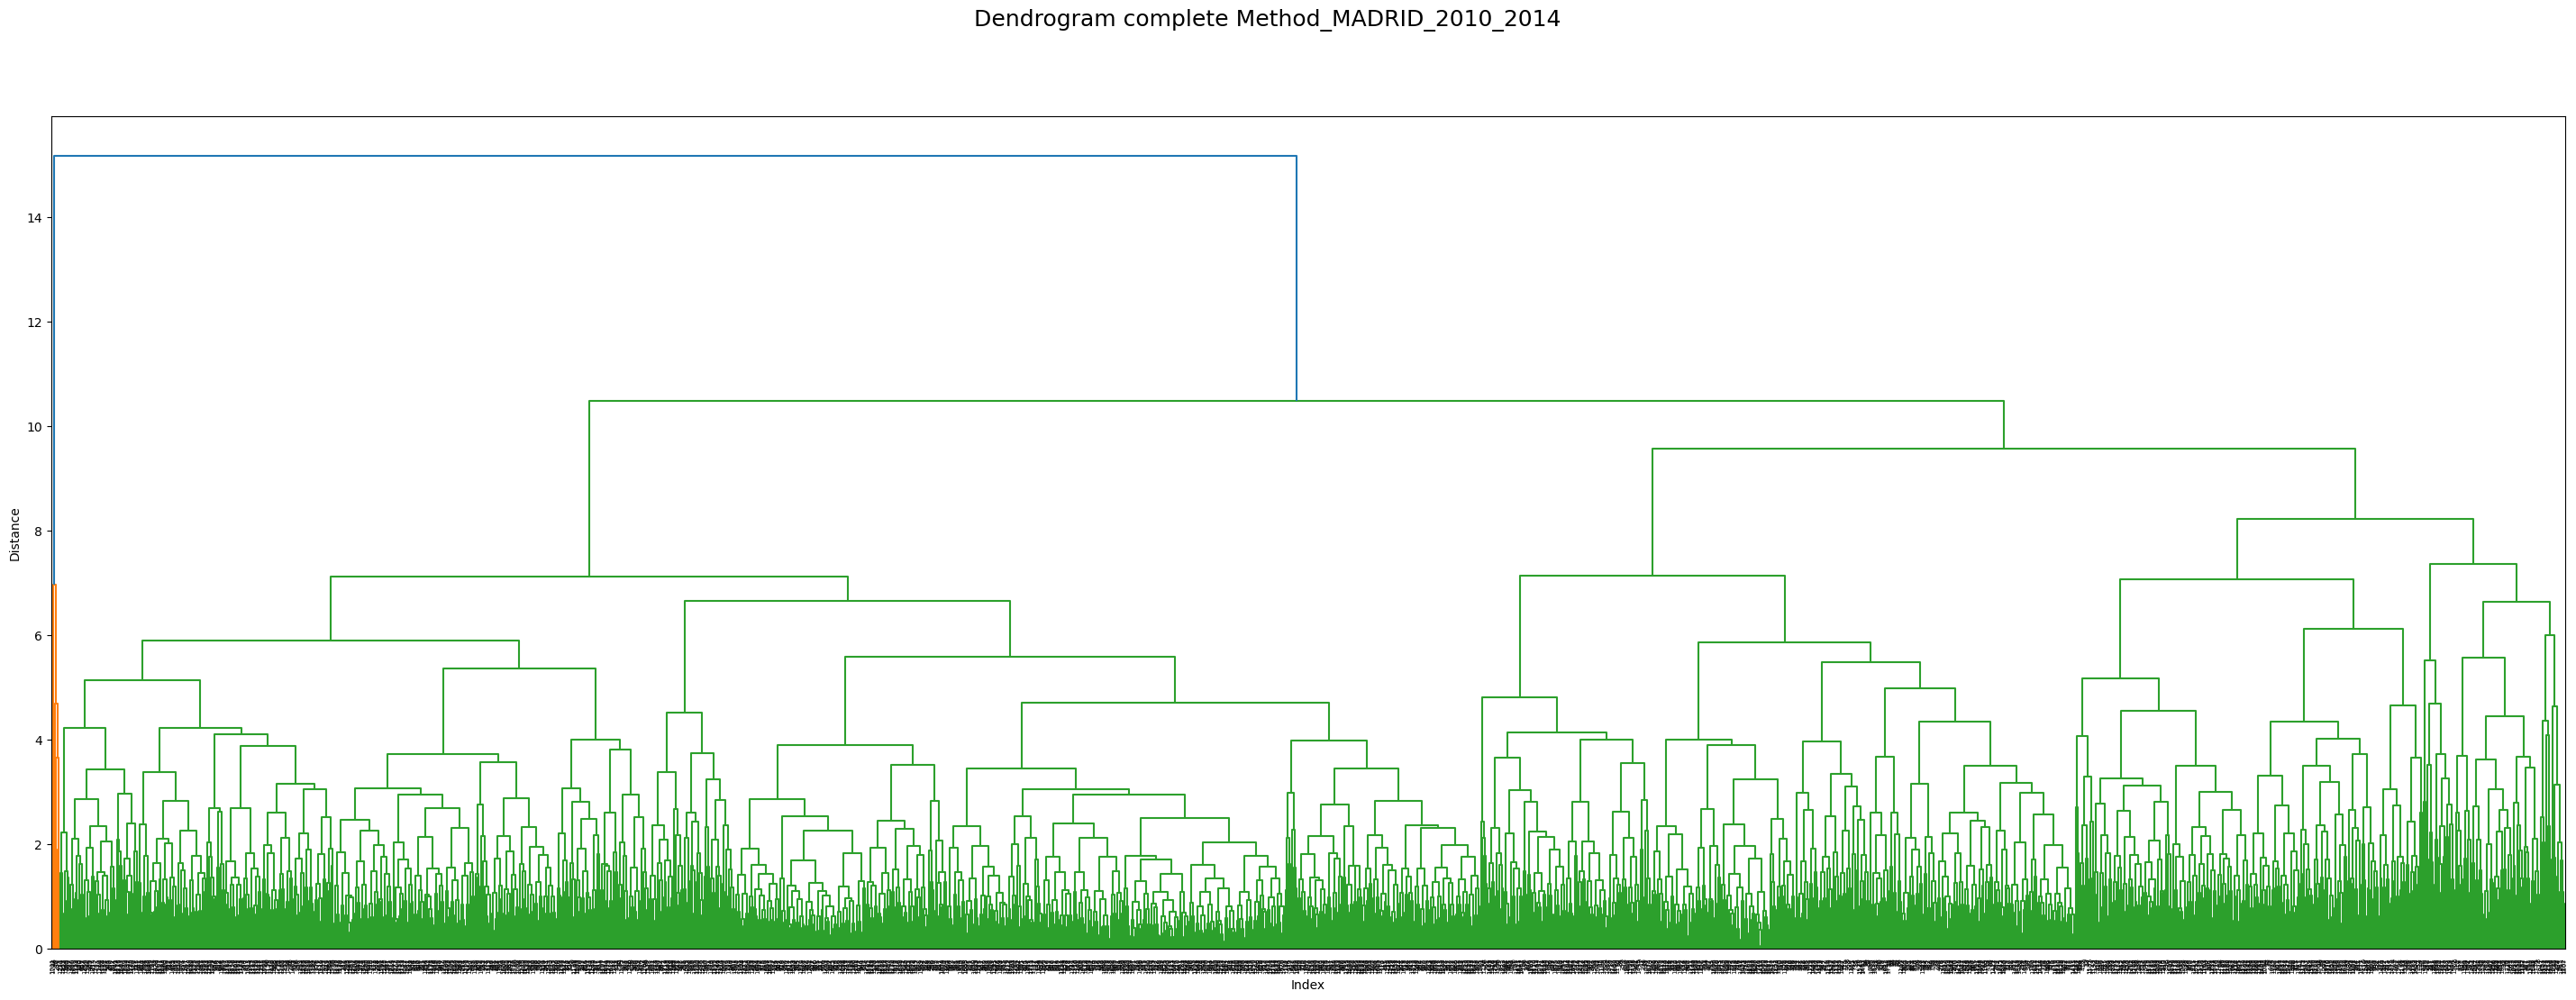


MADRID: COMPLETE
Clusters  1    2
Pleasent        
0         6  955
1         0  865


MADRID: COMPLETE
Clusters  1    2    3
Pleasent             
0         6  205  750
1         0  827   38


MADRID: COMPLETE
Clusters  1    2    3    4
Pleasent                  
0         6  205  404  346
1         0  827   28   10



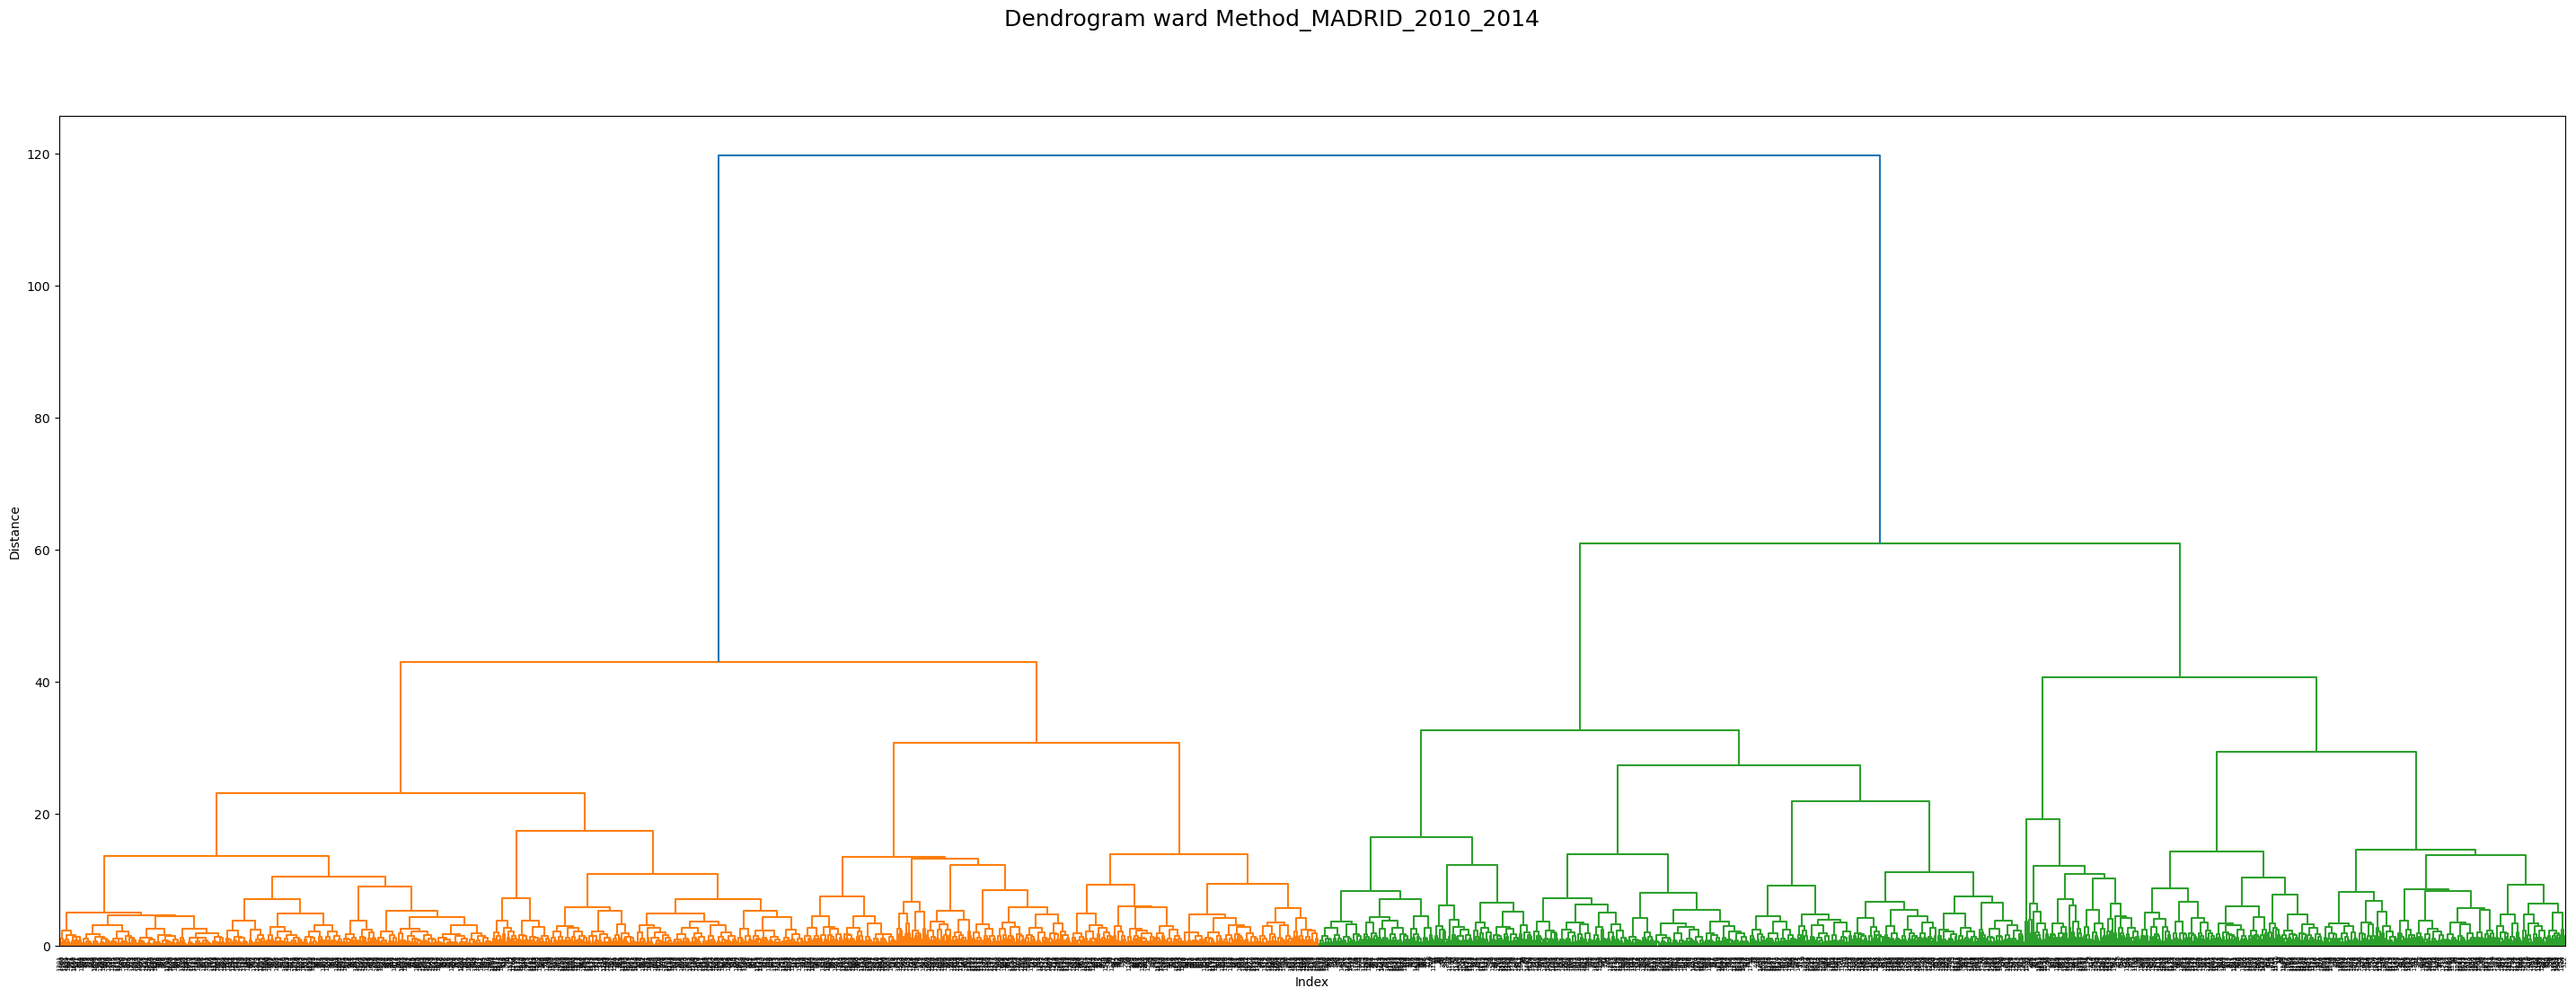


MADRID: WARD
Clusters    1    2
Pleasent          
0         121  840
1         797   68


MADRID: WARD
Clusters    1    2    3
Pleasent               
0         121  478  362
1         797   36   32


MADRID: WARD
Clusters    1    2    3    4
Pleasent                    
0          21  100  478  362
1         521  276   36   32



In [12]:
methodTypes = ['single', 'average', 'complete', 'ward']
for methodDend in methodTypes:
    dendroType(methodDend, scaled_features, dataset, 5, LocationSub, datasetPlusPleasent)